### using pyroma conda env 

In [1]:
import scanpy as sc
import time
from pyROMA.ROMA import *
import os
print(os.getcwd())
print(ROMA)

/home/az/Projects/01_Curie/05_pyROMA/pyROMA_shared
<class 'pyROMA.ROMA.ROMA'>


In [2]:
# Initialize ROMA
roma = ROMA()
# this should be empty at first
roma.adata

In [3]:
roma

scROMA

### Load the dataset, normalized rna expression matrix

In [4]:
import pandas as pd

df = pd.read_csv('datasets/from_R/rheman-cf-ncf-rna-exp-matrix-norm.tsv', sep='\t')
print(df.shape)
df.head()

(19107, 12)


,GSM5356205,GSM5356206,GSM5356207,GSM5356208,GSM5356209,GSM5356210,GSM5356217,GSM5356218,GSM5356219,GSM5356220,GSM5356221,GSM5356222
A2M,-2.276695,-2.276695,-2.276695,-2.276695,-2.276695,-2.276695,-2.276695,-2.276695,-2.276695,0.276775,-2.276695,-2.276695
NAT2,-0.529709,-1.701147,-1.186181,-1.784351,0.015076,-0.821612,-0.985824,-0.070284,-2.276695,0.173414,-0.629473,-0.258930
ACADM,7.426065,7.734505,7.554314,7.304610,7.298017,7.432436,7.630496,7.574262,6.923768,7.805810,7.493325,7.449435
ACADS,5.289551,5.117106,5.228877,5.227824,5.160557,5.624386,4.466059,5.670722,5.132320,5.266203,5.207499,5.516344
ACADVL,-2.276695,4.346211,-2.276695,5.275499,0.354508,6.596574,2.555607,0.866217,3.231686,-1.419318,2.670606,3.046472


#### Additional metdata

In [5]:
sample_labels = pd.read_csv('datasets/from_R/rheman-cf-ncf-rna-exp-matrix-norm-sample_labels.tsv', sep='\t')
print(sample_labels.shape)
sample_labels.head()

(12, 3)


,sample_id,Type,CF_sample_id
1,GSM5356205,non_CF,non_CF 1
2,GSM5356206,non_CF,non_CF 2
3,GSM5356207,non_CF,non_CF 3
4,GSM5356208,non_CF,non_CF 4
5,GSM5356209,non_CF,non_CF 5


In [6]:
sample_labels.tail()

,sample_id,Type,CF_sample_id
8,GSM5356218,CF,CF 2
9,GSM5356219,CF,CF 3
10,GSM5356220,CF,CF 4
11,GSM5356221,CF,CF 5
12,GSM5356222,CF,CF 6


### Convert into adata object

In [7]:
import anndata
adata = anndata.AnnData(df.T)
adata

AnnData object with n_obs × n_vars = 12 × 19107

In [8]:
# Genes are in the var
adata.var

""
A2M
NAT2
ACADM
ACADS
ACADVL
...
SLC16A12
C2orf66
SFXN4
KRT39


In [9]:
adata.obs

""
GSM5356205
GSM5356206
GSM5356207
GSM5356208
GSM5356209
GSM5356210
GSM5356217
GSM5356218
GSM5356219
GSM5356220


In [10]:
sample_labels.set_index('sample_id', inplace=True)
sample_labels.head()

,Type,CF_sample_id
sample_id,,
GSM5356205,non_CF,non_CF 1
GSM5356206,non_CF,non_CF 2
GSM5356207,non_CF,non_CF 3
GSM5356208,non_CF,non_CF 4
GSM5356209,non_CF,non_CF 5


In [11]:
adata.obs = sample_labels

In [12]:
adata.obs

,Type,CF_sample_id
sample_id,,
GSM5356205,non_CF,non_CF 1
GSM5356206,non_CF,non_CF 2
GSM5356207,non_CF,non_CF 3
GSM5356208,non_CF,non_CF 4
GSM5356209,non_CF,non_CF 5
GSM5356210,non_CF,non_CF 6
GSM5356217,CF,CF 1
GSM5356218,CF,CF 2
GSM5356219,CF,CF 3


In [13]:
roma.adata = adata
print(roma.adata)

AnnData object with n_obs × n_vars = 12 × 19107
    obs: 'Type', 'CF_sample_id'


### optional steps  if data is not normalized or needs further filtering 

In [14]:
# Download and preprocess adata
#adata = sc.read_h5ad('datasets/rna_10xpmbc3k.h5ad')
#sc.pp.filter_cells(adata, min_genes = 200)
#sc.pp.filter_genes(adata, min_cells = 3)

#sc.pp.normalize_total(adata, target_sum=1e4)
#sc.pp.log1p(adata)

#sc.pp.highly_variable_genes(adata, n_top_genes=5000)#, flavor='seurat_v3')
#adata = adata[:, adata.var.highly_variable]
#adata = adata[adata.obs['celltype'] == 'B']
#adata.X = adata.X.todense()


### Initialize the pathways .gmt file

In [15]:
# We use MSigDB Hallmark 2023 file, which is stored in the genesets folder
roma.gmt ='h.all.v2023.1.Hs.symbols'

In [16]:
# This function allows to load the patwhays into dictionary
pathways = roma.read_gmt_to_dict('h.all.v2023.1.Hs.symbols')

In [17]:
query = ['pical', 'surface', 'fatty', 'acid metabolism', 'oagulation', 'IL-17', 'IL', 'interleukin-17', 'TNF', 'ilium', 'emostasis'] 
query_upper = [x.upper() for x in query]
print(query_upper)
for k, v in pathways.items():
    for x in query_upper:
        if x in k:
            print(k)

['PICAL', 'SURFACE', 'FATTY', 'ACID METABOLISM', 'OAGULATION', 'IL-17', 'IL', 'INTERLEUKIN-17', 'TNF', 'ILIUM', 'EMOSTASIS']
HALLMARK_TNFA_SIGNALING_VIA_NFKB
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_APICAL_JUNCTION
HALLMARK_APICAL_SURFACE
HALLMARK_APICAL_SURFACE
HALLMARK_FATTY_ACID_METABOLISM
HALLMARK_COAGULATION
HALLMARK_IL2_STAT5_SIGNALING
HALLMARK_BILE_ACID_METABOLISM


In [18]:
# This variable specifies Which pathways to check
# alternatively: pathways_to_check = 'all' will check all the pathways in the reactome .gmt file 

pathways_to_check = 'all'

# pathways_to_check = ['HALLMARK_TNFA_SIGNALING_VIA_NFKB',
#     'HALLMARK_IL6_JAK_STAT3_SIGNALING',
#     'HALLMARK_APICAL_JUNCTION',
#     'HALLMARK_APICAL_SURFACE',
#     'HALLMARK_APICAL_SURFACE',
#     'HALLMARK_COAGULATION',
#     'HALLMARK_IL2_STAT5_SIGNALING',
#     'HALLMARK_BILE_ACID_METABOLISM']


In [19]:
roma

scROMA

In [20]:
# Filter pathways that have less genes than min_n_number
roma.min_n_genes

10

In [21]:
# Granularity of the null geneset size, from 0 to 100, less is more precise
roma.approx_int = 1

### Run the ROMA analysis

In [22]:
# Set the number of iterations to create the null distribution
iters = 10

In [23]:

start = time.time()
roma.compute(pathways_to_check, parallel=True, incremental=False, iters=iters)
end = time.time()
minutes, seconds = divmod(end - start, 60)
print(f"Truncated Parallel {iters} iterations, running time (min): " + "{:0>2}:{:05.2f}".format(int(minutes),seconds))

#adata

Processing gene set: HALLMARK_NOTCH_SIGNALING | len of subsetlist:  32 
Processing gene set: HALLMARK_HEDGEHOG_SIGNALING | len of subsetlist:  36 
Processing gene set: HALLMARK_ANGIOGENESIS | len of subsetlist:  36 
Took null distribution from previous calculation
Processing gene set: HALLMARK_PANCREAS_BETA_CELLS | len of subsetlist:  39 
Processing gene set: HALLMARK_WNT_BETA_CATENIN_SIGNALING | len of subsetlist:  42 
Processing gene set: HALLMARK_APICAL_SURFACE | len of subsetlist:  44 
Processing gene set: HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY | len of subsetlist:  49 
Processing gene set: HALLMARK_TGF_BETA_SIGNALING | len of subsetlist:  54 
Processing gene set: HALLMARK_MYC_TARGETS_V2 | len of subsetlist:  57 
Processing gene set: HALLMARK_CHOLESTEROL_HOMEOSTASIS | len of subsetlist:  74 
Processing gene set: HALLMARK_IL6_JAK_STAT3_SIGNALING | len of subsetlist:  87 
Processing gene set: HALLMARK_PROTEIN_SECRETION | len of subsetlist:  96 
Processing gene set: HALLMARK_INTERFE

### After the computation is done, roma updates its status

In [24]:
roma

scROMA: module activities are computed

### In the roma.adata object we could see new entities  

In [25]:
roma.adata

AnnData object with n_obs × n_vars = 12 × 19107
    obs: 'Type', 'CF_sample_id'
    uns: 'ROMA', 'ROMA_stats', 'ROMA_active_modules'

### The ROMA_stats table shows all the computed pathways with their L1 scores and p-values, as well as Median_Expression with corresponding q_values
p and q values are already adjusted using Benjamini-Hochberg FDR procedure

In [26]:
roma.adata.uns['ROMA_stats']

,L1,p_value,Median_Exp,q_value
HALLMARK_NOTCH_SIGNALING,0.287957,0.680272,3.811863e-15,0.681818
HALLMARK_HEDGEHOG_SIGNALING,0.312747,0.680272,-1.640038e-15,0.865801
HALLMARK_ANGIOGENESIS,0.462983,0.680272,-1.000451e-01,1.000000
HALLMARK_PANCREAS_BETA_CELLS,0.382546,0.680272,1.823434e-03,0.614251
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.311940,0.680272,1.873006e-01,0.197628
HALLMARK_APICAL_SURFACE,0.220006,0.680272,4.641478e-02,0.426136
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY,0.253498,0.680272,6.224857e-02,0.426136
HALLMARK_TGF_BETA_SIGNALING,0.229724,0.680272,-3.975393e-03,1.000000
HALLMARK_MYC_TARGETS_V2,0.312704,0.680272,1.163968e-01,0.197628
HALLMARK_CHOLESTEROL_HOMEOSTASIS,0.252840,0.680272,-5.963008e-02,1.000000


### We could further filter out which pathways would be considered significantly active

In [27]:
# took a higher treshold
roma.select_active_modules(p_threshold=0.05, q_threshold=0.05)

### Significantly active patwhays are stored in ROMA_active_modules

In [28]:
roma.adata.uns['ROMA_active_modules']

,L1,p_value,Median_Exp,q_value


In [29]:
ifn_result = roma.adata.uns['ROMA']['HALLMARK_INTERFERON_GAMMA_RESPONSE']
ifn_result

GeneSetResult HALLMARK_INTERFERON_GAMMA_RESPONSE

In [30]:
print(ifn_result.projections_1.shape)
print(ifn_result.projections_2.shape)

(199,)
(199,)


In [31]:
ifn_result.null_projections.shape

(10, 2, 199)

### Plot the pathway projections in the PCA space against the null distribution  

In [32]:
roma

scROMA: module activities are computed

In [33]:
geneset_name = 'HALLMARK_INTERFERON_GAMMA_RESPONSE'



roma.pl.plot_gene_projections(geneset_name)

TypeError: plot_gene_projections() missing 1 required positional argument: 'geneset_name'

In [38]:
roma.pl()

In [41]:
roma.pl().plot_gene_projections(geneset_name)

NameError: name 'roma' is not defined

In [39]:
roma.adata.uns['ROMA_active_modules']

,L1,p_value,Median_Exp,q_value


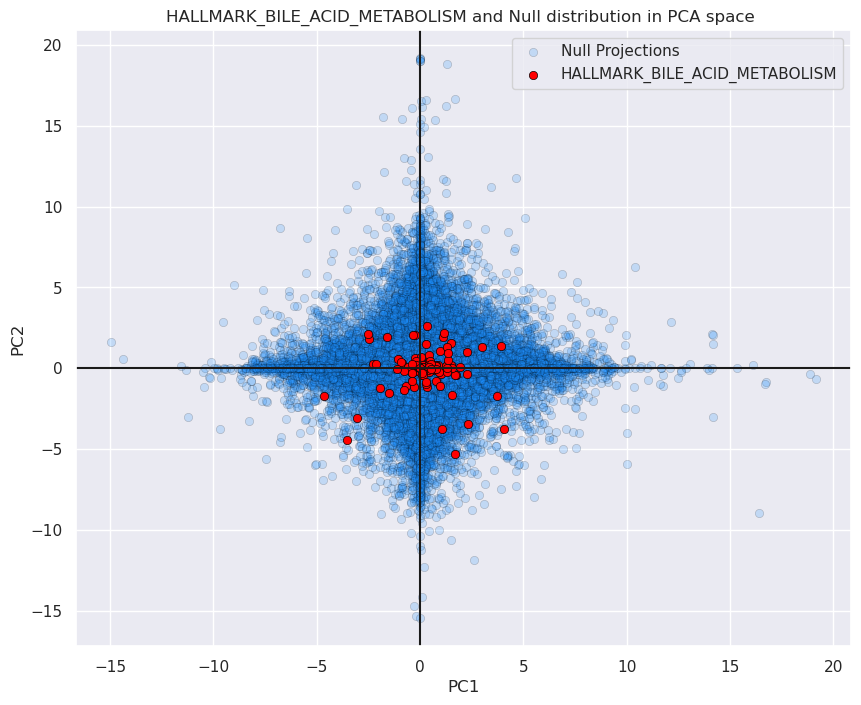

In [ ]:
plot_gene_projections('HALLMARK_BILE_ACID_METABOLISM')

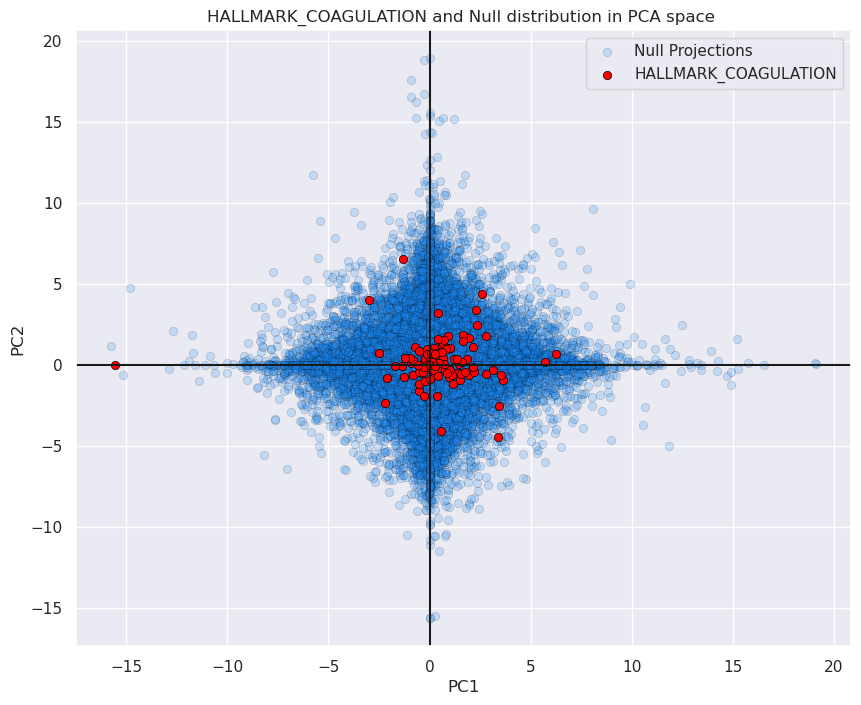

In [ ]:
plot_gene_projections('HALLMARK_COAGULATION')

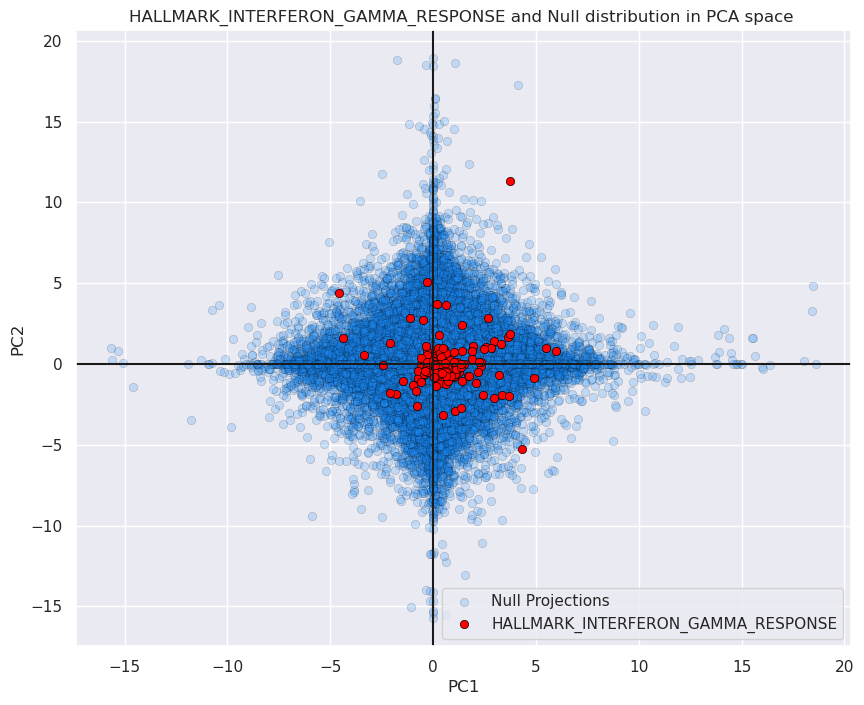

In [ ]:
plot_gene_projections('HALLMARK_INTERFERON_GAMMA_RESPONSE')

In [ ]:
roma.adata.uns['ROMA']['HALLMARK_COAGULATION'].test_l1

0.34299912342697014

### Plotting the gene weights

In [ ]:
roma.pl.gene_weights()

### In ROMA entity, if we query the pathway name we could retrieve additional information

In [ ]:
roma.adata.uns['ROMA']['HALLMARK_COAGULATION'].q_value

0.18315018315018314

### e.g. outlier genes (in this pathway there were none) 

In [ ]:
roma.adata.uns['ROMA']['HALLMARK_COAGULATION'].outliers

[]

### or we could have a look at the null distribution of median expression values

In [ ]:
roma.adata.uns['ROMA']['HALLMARK_COAGULATION'].null_median_exp.shape

(1000,)